### Explication du dataset
| Variable   | Description            | Valeurs                              |
|------------|------------------------|--------------------------------------|
| survival   | Survie                 | 0 = Non, 1 = Oui                     |
| pclass     | Classe du billet       | 1 = 1ère, 2 = 2nde, 3 = 3ème         |
| sex        | Sexe                   |                                      |
| Age        | Âge en années          |                                      |
| sibsp      | # de frères/soeurs     |                                      |
| parch      | # de parents/enfants   |                                      |
| ticket     | Numéro de billet       |                                      |
| fare       | Prix du billet         |                                      |
| cabin      | Numéro de cabine       |                                      |
| embarked   | Port d'embarquement    | C = Cherbourg, Q = Queenstown, S = Southampton |


### Importations

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Ignorer les avertissements spécifiques à la conversion des données
warnings.filterwarnings(action='ignore', category=UserWarning)

### Charge le DataFrame avec les données

In [2]:
train_data = pd.read_csv('Titanic/train.csv')

In [3]:
# afficher les 10 premières lignes
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Indexation des données

In [4]:
# PassengerId devient l'index
train_data.set_index('PassengerId', inplace=True, drop=True)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Analyse des variables

In [5]:
# affiche les colonnes
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# affiche une analyse statistique des données
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# compte le nombre de valeurs pour chaque colonne
train_data.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

### Préparation des données

In [8]:
# Regroupement de données par lien de parenté (Fare, SibSp, Parch)

def parse_model_1(train_file):
    train_data = pd.read_csv(train_file)
    train_data.set_index('PassengerId', inplace=True, drop=True)
    X = train_data[['Fare','SibSp', 'Parch']]
    y = train_data['Survived']
    return X, y

X, y = parse_model_1('Titanic/train.csv')
X.head()

# y = l'index du dataframe
# X = les colonnes du dataframe

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Afficher les dimensions des ensembles
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (801, 3)
Dimensions de X_test : (90, 3)
Dimensions de y_train : (801,)
Dimensions de y_test : (90,)


In [9]:
def compute_score(classifier, X_train, y_train, X_test, y_test):
    # split X 
    # cross_val_score permet de calculer la précision du classifieur
    score = cross_val_score(classifier, X_train, y_train, cv=5)

    # fit permet d'entrainer le classifieur et score de calculer la précision
    classifier.fit(X_train, y_train)
    return round(score.mean(), 3), classifier.score(X_test, y_test)

**À savoir** :
la différence entre fit et cross_val_score est la suivante: 
- cross_val_score entraine le classifieur plusieurs fois sur des sous-ensembles de données différents et calcule la précision moyenne sur ces sous-ensembles de données.

- fit entraine le classifieur sur l'ensemble des données et calcule la précision sur l'ensemble des données. 

In [10]:
score, score2 = compute_score(LogisticRegression(), X_train, y_train, X_test, y_test)
score, score2

(0.67, 0.7)

### Etude des variables

In [11]:
# Création de deux dataframes pour les personnes ayant survécu et celles étant décédées
survived = train_data[train_data['Survived'] == 1]
died = train_data[train_data['Survived'] == 0]

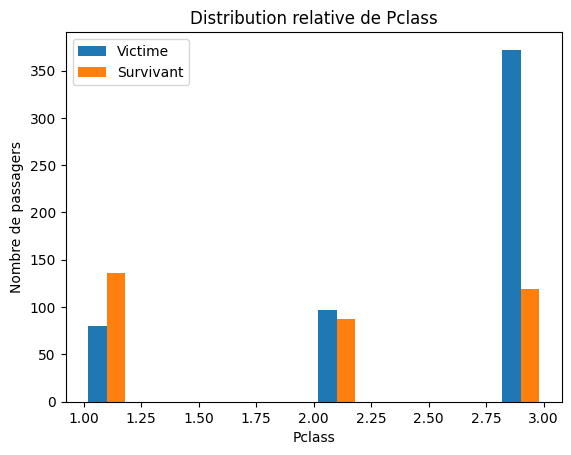

In [12]:
def plot_hist(data, variable):
    plt.hist([
        died[variable],
        survived[variable]
    ], label=['Victime', 'Survivant'])
    plt.legend(loc='upper left')
    plt.title(f'Distribution relative de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Nombre de passagers')
    plt.show()
plot_hist(train_data, 'Pclass')

##### Question 3.2.2

La variable Pclass est importante car elle distingue clairement la discrimination des classes, on voit que le 3ème classe est celle qui contient le plus de décès.

In [13]:
dummies = pd.get_dummies(train_data['Pclass'], prefix='split_Pclass')
dummies
# get_dummies permet de transformer une variable catégorielle en une variable numérique

,split_Pclass_1,split_Pclass_2,split_Pclass_3
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,True,False,False
5,False,False,True
...,...,...,...
887,False,True,False
888,True,False,False
889,False,False,True


In [14]:
# Ecrire la fonction parse_model_2 en injectant les instructions précédentes dans la
# fonction parse_model_1 de la question 2.1

def parse_model_2(train_file, injected_data):
    # Utilisation de la fonction parse_model_1
    data = parse_model_1(train_file)

    # Injection des nouvelles données
    new_data = pd.concat([data[0], injected_data], axis=1)
    return new_data, data[1]

X_perso, y_perso = parse_model_2('Titanic/train.csv', dummies)
X_perso.head()

# Diviser les données en ensembles d'entraînement et de test
X_train_perso, X_test_perso, y_train_perso, y_test_perso = train_test_split(X_perso, y_perso, test_size=0.1, random_state=42)

In [15]:
score = compute_score(LogisticRegression(), X_train_perso, y_train_perso, X_test_perso, y_test_perso)
score

(0.694, 0.7222222222222222)

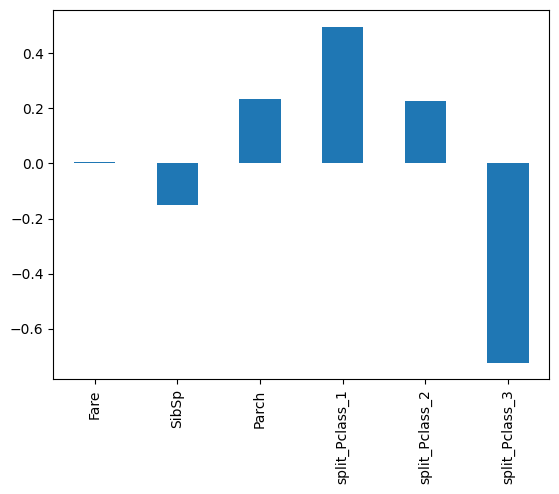

In [16]:
def plot_lr_coefs(X, lr):
    coefs = pd.Series(lr.coef_[0], index=X.columns)
    coefs.plot(kind='bar')
    plt.show()

lr = LogisticRegression(max_iter=1000)
lr.fit(X_perso, y_perso)
plot_coef = plot_lr_coefs(X_perso, lr)
plot_coef

#### Question 3.4.4

D'après le graphique, on confirme bien que `Pclass` est une variable importante, et en particulier les gens de la 3ème classe.
En effet, les variables de `Pclass` ont toutes un poids positif ou négatif assez voir très important.